In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import datasets
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time 
iris = pd.read_csv("C:/Users/user/OneDrive/桌面/雲科/碩一上/資料探勘/HW3/iris.data")
iris

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
iris.apply(lambda x:np.sum(x==' ?'))

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [3]:

labelencoder = LabelEncoder()
iris_v2=pd.DataFrame(iris)
iris_v2['class'] = labelencoder.fit_transform(iris_v2['class'])
iris_v2

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(iris_v2)
x_scaled = scaler.transform(iris_v2)
iris_final=pd.DataFrame(x_scaled,columns=iris_v2.columns)
iris_final

,sepal-length,sepal-width,petal-length,petal-width,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [5]:
X = iris_final.drop(labels=['class'],axis=1)
X
iris_class = iris_final['class'].values

In [6]:
#開始時間
start = time.time()

Agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pred = Agg.fit_predict(X)

#結束時間
end = time.time()
print("運行時間: ",end-start)

y_true = iris_class

運行時間:  0.006980419158935547


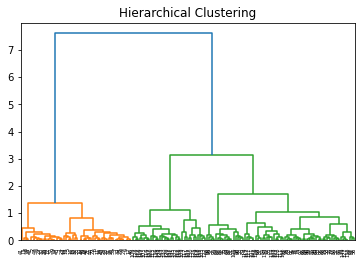

In [7]:
dis=sch.linkage(X,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

In [8]:

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
a = purity_score(y_true, y_pred)

print("分群績效: ",a)


分群績效:  0.8866666666666667
